In [210]:

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
import seaborn as sns
from scipy import stats

In [2718]:
# Read the data

df = pd.read_csv("http://data.insideairbnb.com/italy/lombardy/milan/2021-12-15/data/listings.csv.gz")
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6400,https://www.airbnb.com/rooms/6400,20211215062326,2021-12-15,The Studio Milan,"Enjoy your stay at The Studio, a light-filled ...",The neighborhood is quiet and very well connec...,https://a0.muscache.com/pictures/474737/5955ba...,13822,https://www.airbnb.com/users/show/13822,Francesca,2009-04-17,"Milan, Lombardia, Italy","I'm am Francesca Sottilaro, i live in Milan an...",NaN,NaN,NaN,f,https://a0.muscache.com/im/users/13822/profile...,https://a0.muscache.com/im/users/13822/profile...,Zona 5,1.0,1.0,"['email', 'phone', 'reviews']",t,f,"Milan, Lombardy, Italy",TIBALDI,NaN,45.44119,9.17813,Private room in rental unit,Private room,1,NaN,3.5 baths,3.0,1.0,"[""First aid kit"", ""Gym"", ""Breakfast"", ""Air con...",$100.00,4,5,4,4,5,5,4.0,5.0,NaN,t,23,53,83,358,2021-12-15,12,0,0,2010-04-19,2019-04-13,4.89,5.00,5.00,5.00,5.00,4.56,4.67,NaN,f,1,0,1,0,0.08
1,23986,https://www.airbnb.com/rooms/23986,20211215062326,2021-12-15,""" Characteristic Milanese flat""",I look forward to welcoming you in my flat; it...,NaN,https://a0.muscache.com/pictures/623d63f8-56cf...,95941,https://www.airbnb.com/users/show/95941,Jeremy,2010-03-19,"Milan, Lombardy, Italy","Hallo , I'm Jeremy Hayne I live in Milan and I...",NaN,NaN,NaN,f,https://a0.muscache.com/im/users/95941/profile...,https://a0.muscache.com/im/users/95941/profile...,Navigli,1.0,1.0,"['email', 'reviews', 'jumio', 'offline_governm...",t,t,NaN,NAVIGLI,NaN,45.44806,9.17373,Entire rental unit,Entire home/apt,4,NaN,1 bath,1.0,1.0,"[""Cooking basics"", ""Hot water"", ""Iron"", ""Hair ...",$150.00,1,730,1,1,730,730,1.0,730.0,NaN,t,28,58,88,363,2021-12-15,16,1,0,2012-04-24,2021-10-25,4.67,4.56,4.38,4.44,4.56,4.56,4.50,NaN,f,1,1,0,0,0.14
2,28300,https://www.airbnb.com/rooms/28300,20211215062326,2021-12-15,nice flat near the park,<b>The space</b><br />I rent one room in Milan...,NaN,https://a0.muscache.com/pictures/608641/d214a1...,121663,https://www.airbnb.com/users/show/121663,Marta,2010-05-10,"Milan, Lombardia, Italy","ciao, sono marta, sono italiana, abito a Milan...",a few days or more,0%,0%,f,https://a0.muscache.com/im/pictures/user/e3f22...,https://a0.muscache.com/im/pictures/user/e3f22...,Centro Storico,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'man...",t,t,NaN,SARPI,NaN,45.47647,9.17359,Private room in condominium (condo),Private room,2,NaN,1.5 baths,1.0,2.0,"[""Breakfast"", ""Hot water"", ""Iron"", ""Hair dryer...",$180.00,1,14,1,1,14,14,1.0,14.0,NaN,t,30,60,90,365,2021-12-15,8,0,0,2012-04-22,2015-10-25,4.71,4.71,4.86,4.86,4.86,5.00,5.00,NaN,f,1,0,1,0,0.07
3,37256,https://www.airbnb.com/rooms/37256,20211215062326,2021-12-15,COZY FULLY FURNISHED PRIVATE STUDIO CITY CENTER,"COZY, FULLY F

In [3545]:
df_copy = df.copy()
#Shape of date
print(" Shape of  dataframe: ", df_copy.shape)

 Shape of  dataframe:  (16784, 74)


# 1. explore the datasets


<div class="alert alert-block alert-warning">
    
1.1.  shape of the dataframe and dropping duplicates
</div>


In [3546]:
# Drop duplicates
df_copy = df_copy.drop_duplicates()
df_copy.head()

#Shape of dataframe
print(" Shape of  dataframe: ", df_copy.shape)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6400,https://www.airbnb.com/rooms/6400,20211215062326,2021-12-15,The Studio Milan,"Enjoy your stay at The Studio, a light-filled ...",The neighborhood is quiet and very well connec...,https://a0.muscache.com/pictures/474737/5955ba...,13822,https://www.airbnb.com/users/show/13822,Francesca,2009-04-17,"Milan, Lombardia, Italy","I'm am Francesca Sottilaro, i live in Milan an...",NaN,NaN,NaN,f,https://a0.muscache.com/im/users/13822/profile...,https://a0.muscache.com/im/users/13822/profile...,Zona 5,1.0,1.0,"['email', 'phone', 'reviews']",t,f,"Milan, Lombardy, Italy",TIBALDI,NaN,45.44119,9.17813,Private room in rental unit,Private room,1,NaN,3.5 baths,3.0,1.0,"[""First aid kit"", ""Gym"", ""Breakfast"", ""Air con...",$100.00,4,5,4,4,5,5,4.0,5.0,NaN,t,23,53,83,358,2021-12-15,12,0,0,2010-04-19,2019-04-13,4.89,5.00,5.00,5.00,5.00,4.56,4.67,NaN,f,1,0,1,0,0.08
1,23986,https://www.airbnb.com/rooms/23986,20211215062326,2021-12-15,""" Characteristic Milanese flat""",I look forward to welcoming you in my flat; it...,NaN,https://a0.muscache.com/pictures/623d63f8-56cf...,95941,https://www.airbnb.com/users/show/95941,Jeremy,2010-03-19,"Milan, Lombardy, Italy","Hallo , I'm Jeremy Hayne I live in Milan and I...",NaN,NaN,NaN,f,https://a0.muscache.com/im/users/95941/profile...,https://a0.muscache.com/im/users/95941/profile...,Navigli,1.0,1.0,"['email', 'reviews', 'jumio', 'offline_governm...",t,t,NaN,NAVIGLI,NaN,45.44806,9.17373,Entire rental unit,Entire home/apt,4,NaN,1 bath,1.0,1.0,"[""Cooking basics"", ""Hot water"", ""Iron"", ""Hair ...",$150.00,1,730,1,1,730,730,1.0,730.0,NaN,t,28,58,88,363,2021-12-15,16,1,0,2012-04-24,2021-10-25,4.67,4.56,4.38,4.44,4.56,4.56,4.50,NaN,f,1,1,0,0,0.14
2,28300,https://www.airbnb.com/rooms/28300,20211215062326,2021-12-15,nice flat near the park,<b>The space</b><br />I rent one room in Milan...,NaN,https://a0.muscache.com/pictures/608641/d214a1...,121663,https://www.airbnb.com/users/show/121663,Marta,2010-05-10,"Milan, Lombardia, Italy","ciao, sono marta, sono italiana, abito a Milan...",a few days or more,0%,0%,f,https://a0.muscache.com/im/pictures/user/e3f22...,https://a0.muscache.com/im/pictures/user/e3f22...,Centro Storico,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'man...",t,t,NaN,SARPI,NaN,45.47647,9.17359,Private room in condominium (condo),Private room,2,NaN,1.5 baths,1.0,2.0,"[""Breakfast"", ""Hot water"", ""Iron"", ""Hair dryer...",$180.00,1,14,1,1,14,14,1.0,14.0,NaN,t,30,60,90,365,2021-12-15,8,0,0,2012-04-22,2015-10-25,4.71,4.71,4.86,4.86,4.86,5.00,5.00,NaN,f,1,0,1,0,0.07
3,37256,https://www.airbnb.com/rooms/37256,20211215062326,2021-12-15,COZY FULLY FURNISHED PRIVATE STUDIO CITY CENTER,"COZY, FULLY F

 Shape of  dataframe:  (16784, 74)


<div class="alert alert-block alert-warning">
    
1.2 Check the missing value
</div>




In [3547]:
# get number of missing value with rank
null= df_copy.isnull().sum().sort_values(ascending=False)

#get percent missing value
total = df_copy.shape[0]
percent_missing= (df_copy.isnull().sum()/total).sort_values(ascending=False)

#Combine the the dataset of missing value
missing_data= pd.concat([null, percent_missing], axis=1, 
                        keys=['Total missing', 'Percent missing'])
missing_data.reset_index(inplace=True)
missing_data = missing_data.rename(columns= { "index": " column name"})

#desplay the missing value information
missing_data.head(26)

,column name,Total missing,Percent missing
0,neighbourhood_group_cleansed,16784,1.000000
1,bathrooms,16784,1.000000
2,calendar_updated,16784,1.000000
3,license,15195,0.905327
4,host_about,7334,0.436964
5,neighbourhood,6959,0.414621
6,neighborhood_overview,6959,0.414621
7,host_response_rate,6413,0.382090
8,host_response_time,6413,0.382090
9,host_acceptance_rate,6292,0.374881


In [3548]:
# Drop missing value greater than 40%
df_copy.drop(["neighbourhood_group_cleansed","bathrooms",
        "calendar_updated", "license", "host_about",
        "neighbourhood","neighbourhood"],inplace=True, axis=1)

<div class="alert alert-block alert-warning">
    
1.3 Check Data type
</div>



In [3549]:
# we need example of datapoint  to show the data type
# Select no NA columns as a refenrence
df_nona = df_copy.dropna()
df_nona = df_nona.iloc[1].to_frame()

#This code is to create the dataframe of data type 
data_type = pd.DataFrame(data = df.dtypes, columns=['dtype'])

#Merge the refenrence with the data type
data_type_show = pd.concat([data_type, df_nona], axis = 1).sort_values(by = 'dtype', ascending=False)#, axis=1,

#To display all the rows
pd.set_option('display.max_rows', None)
data_type_show

,dtype,6
host_thumbnail_url,object,https://a0.muscache.com/im/users/138683/profil...
neighbourhood_cleansed,object,VIALE MONZA
host_neighbourhood,object,Zona 2
has_availability,object,t
host_verifications,object,"['email', 'phone', 'facebook', 'reviews', 'jum..."
host_has_profile_pic,object,t
host_identity_verified,object,t
neighbourhood,object,NaN
calendar_last_scraped,object,2021-12-15
last_review,object,2021-05-22


In [3550]:
# Convert str to date type
df_copy['calendar_last_scraped'] = pd.to_datetime(df_copy['calendar_last_scraped'])
df_copy['last_review'] = pd.to_datetime(df_copy['last_review'])
df_copy['first_review'] = pd.to_datetime(df_copy['first_review'])
df_copy['last_scraped'] = pd.to_datetime(df_copy['last_scraped'])
df_copy['host_since'] = pd.to_datetime(df_copy['host_since'])

In [3551]:
# drop feature shows the same meaning

df_copy.drop(['calendar_last_scraped'], inplace = True, axis = 1)

In [3552]:
import re

bathrooms_infor = re.findall(r"\d+\.?\d*",str(list(df_copy['bathrooms_text'])))
bathrooms = []
for i in bathrooms_infor:
    bathrooms.append(float(i))

#create the dataframe
bathrooms_df = pd.DataFrame({'bathrooms' : bathrooms})

#merge the two data set
df_copy = pd.concat([bathrooms_df, df_copy], axis=1)


df_copy.drop(["bathrooms_text"], inplace=True, axis=1)

In [3553]:
#convert price to float

df_copy['price'] = df_copy['price'].str[1:]

df_copy['price'] = df_copy["price"].str.replace(',', '')

df_copy['price'] = pd.to_numeric(df_copy["price"], downcast="float")

In [3554]:
# we need example of datapoint  to show the data type
# Select no NA columns as a refenrence
df_nona = df_copy.dropna()
df_nona = df_nona.iloc[1].to_frame()

#This code is to create the dataframe of data type 
data_type = pd.DataFrame(data = df.dtypes, columns=['dtype'])

#Merge the refenrence with the data type
data_type_show = pd.concat([data_type, df_nona], axis = 1).sort_values(by = 'dtype', ascending=False)#, axis=1,

#To display all the rows
pd.set_option('display.max_rows', None)
data_type_show

,dtype,6
host_thumbnail_url,object,https://a0.muscache.com/im/users/138683/profil...
neighbourhood_cleansed,object,VIALE MONZA
host_neighbourhood,object,Zona 2
has_availability,object,t
host_verifications,object,"['email', 'phone', 'facebook', 'reviews', 'jum..."
host_has_profile_pic,object,t
host_identity_verified,object,t
neighbourhood,object,NaN
calendar_last_scraped,object,NaN
last_review,object,2021-05-22 00:00:00


<div class="alert alert-block alert-warning">
    
1.4 drop the irrelavate features
</div>






In [3555]:
# to show the dataframe
df_copy.head()
print(" Shape of  dataframe: ", df_copy.shape)

,bathrooms,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3.5,6400,https://www.airbnb.com/rooms/6400,20211215062326,2021-12-15,The Studio Milan,"Enjoy your stay at The Studio, a light-filled ...",The neighborhood is quiet and very well connec...,https://a0.muscache.com/pictures/474737/5955ba...,13822,https://www.airbnb.com/users/show/13822,Francesca,2009-04-17,"Milan, Lombardia, Italy",NaN,NaN,NaN,f,https://a0.muscache.com/im/users/13822/profile...,https://a0.muscache.com/im/users/13822/profile...,Zona 5,1.0,1.0,"['email', 'phone', 'reviews']",t,f,TIBALDI,45.44119,9.17813,Private room in rental unit,Private room,1,3.0,1.0,"[""First aid kit"", ""Gym"", ""Breakfast"", ""Air con...",100.0,4,5,4,4,5,5,4.0,5.0,t,23,53,83,358,12,0,0,2010-04-19,2019-04-13,4.89,5.00,5.00,5.00,5.00,4.56,4.67,f,1,0,1,0,0.08
1,1.0,23986,https://www.airbnb.com/rooms/23986,20211215062326,2021-12-15,""" Characteristic Milanese flat""",I look forward to welcoming you in my flat; it...,NaN,https://a0.muscache.com/pictures/623d63f8-56cf...,95941,https://www.airbnb.com/users/show/95941,Jeremy,2010-03-19,"Milan, Lombardy, Italy",NaN,NaN,NaN,f,https://a0.muscache.com/im/users/95941/profile...,https://a0.muscache.com/im/users/95941/profile...,Navigli,1.0,1.0,"['email', 'reviews', 'jumio', 'offline_governm...",t,t,NAVIGLI,45.44806,9.17373,Entire rental unit,Entire home/apt,4,1.0,1.0,"[""Cooking basics"", ""Hot water"", ""Iron"", ""Hair ...",150.0,1,730,1,1,730,730,1.0,730.0,t,28,58,88,363,16,1,0,2012-04-24,2021-10-25,4.67,4.56,4.38,4.44,4.56,4.56,4.50,f,1,1,0,0,0.14
2,1.5,28300,https://www.airbnb.com/rooms/28300,20211215062326,2021-12-15,nice flat near the park,<b>The space</b><br />I rent one room in Milan...,NaN,https://a0.muscache.com/pictures/608641/d214a1...,121663,https://www.airbnb.com/users/show/121663,Marta,2010-05-10,"Milan, Lombardia, Italy",a few days or more,0%,0%,f,https://a0.muscache.com/im/pictures/user/e3f22...,https://a0.muscache.com/im/pictures/user/e3f22...,Centro Storico,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'man...",t,t,SARPI,45.47647,9.17359,Private room in condominium (condo),Private room,2,1.0,2.0,"[""Breakfast"", ""Hot water"", ""Iron"", ""Hair dryer...",180.0,1,14,1,1,14,14,1.0,14.0,t,30,60,90,365,8,0,0,2012-04-22,2015-10-25,4.71,4.71,4.86,4.86,4.86,5.00,5.00,f,1,0,1,0,0.07
3,1.0,37256,https://www.airbnb.com/rooms/37256,20211215062326,2021-12-15,COZY FULLY FURNISHED PRIVATE STUDIO CITY CENTER,"COZY, FULLY FURNISHED, PRIVATE STUDIO IN THE C...","Best area of Milan, at walking distance from t...",https://a0.muscache.com/pictures/ae0e12cd-2762...,119002,https://www.airbnb.com/users/show/119002,Giancarlo,2010-05-05,"Milan, Lombardia, Italy",NaN,NaN,NaN,t,https://a0.muscache.com/im/users/119002/profil...,https://a0.muscache.com/im/users/119002/profil...,Centro Storico,2.0,2.0,"['email', 'phone', 'reviews', 

 Shape of  dataframe:  (16784, 67)


In [3556]:
#"property_type"



df_copy.drop(['id',"listing_url", "scrape_id",
              "name","picture_url", "host_id","host_name",
             "host_location","host_thumbnail_url", "host_picture_url",
             "host_neighbourhood","host_listings_count",
             "minimum_minimum_nights", "maximum_minimum_nights",
              "minimum_maximum_nights","maximum_maximum_nights",
             "minimum_nights_avg_ntm","maximum_nights_avg_ntm",'has_availability',
             "number_of_reviews_ltm", "number_of_reviews_l30d",
             "review_scores_accuracy", "review_scores_cleanliness",
              "review_scores_checkin","review_scores_communication",
              "review_scores_location", "review_scores_value",
              "neighborhood_overview", "last_review", "first_review",
             'host_url'], inplace = True, axis = 1)

#Shape of dataframe
print(" Shape of  dataframe after dropping irrelavate fearures: ", df_copy.shape)

 Shape of  dataframe after dropping irrelavate fearures:  (16784, 36)


<div class="alert alert-block alert-warning">
    
1.5 Check correlation
</div>




/var/folders/ls/7z9cnz814t76nd9h4dh8z0nh0000gn/T/ipykernel_43243/1096131944.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<AxesSubplot:>

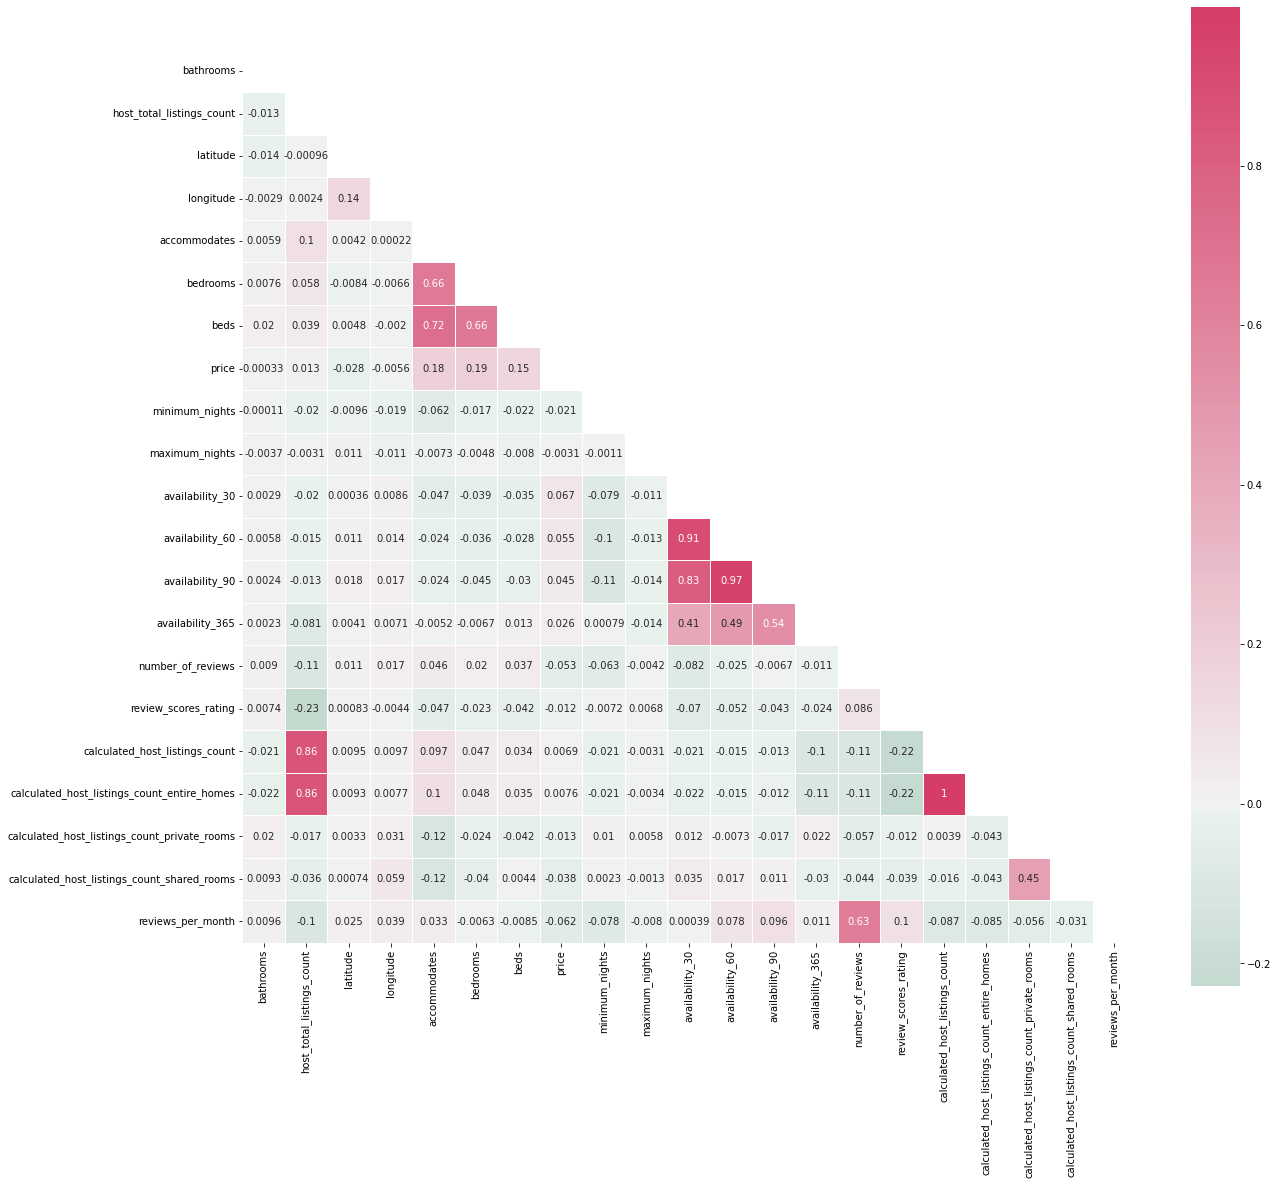

In [3557]:
#create dataframe with numerical columns
df_corr = df_copy.dropna( how='any', subset=list(df_copy.select_dtypes(include=["object"]).columns))



## Creating correlation matrix
corr = df_corr.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(150, 1, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

In [3558]:
#drop any variables which its coorelation are greater than 0.7
df_copy.drop(['calculated_host_listings_count', 'calculated_host_listings_count_entire_homes',
             "bedrooms", "availability_60", "availability_90", "beds", "reviews_per_month"], inplace = True, axis = 1)

# 2. Manipulate the dataframe 

<div class="alert alert-block alert-warning">
    
2.1 Convert numerical type of  taregt variable to bool level
</div>



([<matplotlib.patches.Wedge at 0x7f8a260822b0>,
 [Text(0.29330958843637417, 1.0601742712079392, 'Not Satisfied'),
  Text(-0.2933095884363743, -1.0601742712079392, 'Satisfied')],
 [Text(0.15998704823802226, 0.5782768752043305, '41%'),
  Text(-0.15998704823802232, -0.5782768752043304, '59%')])

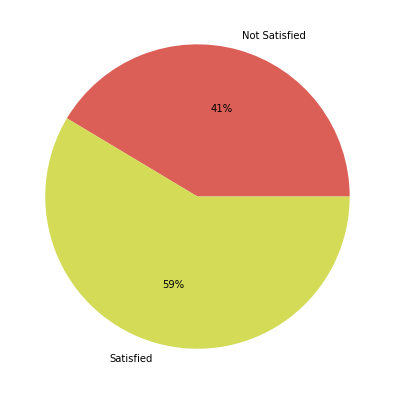

In [3559]:
df_copy['review_scores_rating'] = np.where(df_copy['review_scores_rating']> 4.5, 1, 0)

# Creating plot
data = df_copy.groupby("review_scores_rating").size()
labels = ["Not Satisfied", "Satisfied"]
fig = plt.figure(figsize=(10, 7))
plt.pie(data, autopct='%.0f%%', labels = labels)

<div class="alert alert-block alert-warning">
    
2.2 Deal with missing value
</div>

In [3560]:
#record from our missing value explore


# get number of missing value with rank
null= df_copy.isnull().sum().sort_values(ascending=False)

#get percent missing value
total = df_copy.shape[0]
percent_missing= (df_copy.isnull().sum()/total).sort_values(ascending=False)

#Combine the the dataset of missing value
missing_data= pd.concat([null, percent_missing], axis=1, 
                        keys=['Total missing', 'Percent missing'])
missing_data.reset_index(inplace=True)
missing_data = missing_data.rename(columns= { "index": " column name"})

#desplay the missing value information
missing_data.head(17)

,column name,Total missing,Percent missing
0,host_response_time,6413,0.382090
1,host_response_rate,6413,0.382090
2,host_acceptance_rate,6292,0.374881
3,description,374,0.022283
4,bathrooms,30,0.001787
5,host_since,2,0.000119
6,host_is_superhost,2,0.000119
7,host_total_listings_count,2,0.000119
8,host_has_profile_pic,2,0.000119
9,host_identity_verified,2,0.000119




<div class="alert alert-info"><b>Missing value that below 5%</b> 
    
Dropping all rows 
    
</div>

In [3561]:

df_copy.dropna( how='any', subset=["host_since", "host_is_superhost", 
                              "host_identity_verified", "host_has_profile_pic",
                              "host_total_listings_count","description","bathrooms"
                              ],inplace=True)

<div class="alert alert-info"><b>Missing value:review_scores_rating</b> 
    
Dropping all rows because it is  predicted variable
    
</div>

In [3562]:
df_copy.dropna( how='any', subset=['review_scores_rating'],inplace=True)

<div class="alert alert-info"><b>Missing value: host_response_rate and host_acceptance_rate</b> 
    
Fill na with median after converation from str to numerical type
    
</div>

In [3563]:
# firstly, we fill na with '0%'
df_copy['host_response_rate'] = df_copy['host_response_rate'].fillna('0%')
df_copy['host_acceptance_rate'] = df_copy['host_acceptance_rate'].fillna('0%')


#reset the index
df_copy.reset_index(drop = True, inplace=True)

#remove the signal "%"
host_acceptance_rate = []
host_response_rate = []
for i in range(len(df_copy)):
    host_acceptance_rate.append(int(df_copy['host_acceptance_rate'][i][:-1]))
    host_response_rate.append(int(df_copy['host_response_rate'][i][:-1]))

#create the dataframe
host_df = pd.DataFrame({'host_acceptance_rate_num' : host_acceptance_rate,
                    'host_response_rate_num' : host_response_rate})

#merge the two data set
df_copy = pd.concat([host_df, df_copy], axis=1)

#drop that two feature since we already convert to numerical 
df_copy.drop(["host_response_rate", "host_acceptance_rate"],inplace=True, axis=1)


#fill na with the mean
df_copy['host_response_rate_num'].replace(0,np.nan,inplace = True)
df_copy['host_acceptance_rate_num'] .replace(0,np.nan,inplace = True)

df_copy['host_response_rate_num'] = df_copy['host_response_rate_num'].fillna(df_copy['host_response_rate_num'].mean())
df_copy['host_acceptance_rate_num'] = df_copy['host_acceptance_rate_num'].fillna(df_copy['host_acceptance_rate_num'].mean())

<div class="alert alert-info"><b>Missing value: host_response_time	</b> 
    
Fill na with mode
    
</div>

In [3564]:
df_copy['host_response_time'] = df_copy['host_response_time'].fillna(df_copy['host_response_time'].mode()[0]) 

In [3565]:
#record from our missing value explore


# get number of missing value with rank
null= df_copy.isnull().sum().sort_values(ascending=False)

#get percent missing value
total = df_copy.shape[0]
percent_missing= (df_copy.isnull().sum()/total).sort_values(ascending=False)

#Combine the the dataset of missing value
missing_data= pd.concat([null, percent_missing], axis=1, 
                        keys=['Total missing', 'Percent missing'])
missing_data.reset_index(inplace=True)
missing_data = missing_data.rename(columns= { "index": " column name"})

#desplay the missing value information
missing_data.head(17)

,column name,Total missing,Percent missing
0,host_acceptance_rate_num,0,0.0
1,property_type,0,0.0
2,calculated_host_listings_count_private_rooms,0,0.0
3,instant_bookable,0,0.0
4,review_scores_rating,0,0.0
5,number_of_reviews,0,0.0
6,availability_365,0,0.0
7,availability_30,0,0.0
8,maximum_nights,0,0.0
9,minimum_nights,0,0.0


<div class="alert alert-block alert-warning">
    
2.3 Pre prunching
</div>

In [3566]:
df_copy.shape
#df_copy['neighbourhood_cleansed'].value_counts()

drop_row = list(df_copy['neighbourhood_cleansed'].value_counts().index)[21:]
drop_df = df_copy.loc[df_copy['neighbourhood_cleansed'].isin(drop_row)]

df_copy_index = df_copy.index.tolist()
drop_index = drop_df.index.tolist()
keep_row =  list(set(df_copy_index).difference(set(drop_index)))

df_copy = df_copy.iloc[keep_row]


df_copy.reset_index(drop = True, inplace=True)
df_copy.shape

(16379, 29)

(11039, 29)

In [3567]:
df_copy.shape
#df_copy.reset_index(drop = True, inplace=True)

df_copy['room_type'].value_counts() 
drop_row = ["Shared room", "Hotel room"]
drop_df = df_copy.loc[df_copy['room_type'].isin(drop_row)]

df_copy_index = df_copy.index.tolist()
drop_index = drop_df.index.tolist()
keep_row =  list(set(df_copy_index).difference(set(drop_index)))

df_copy = df_copy.iloc[keep_row]


df_copy.reset_index(drop = True, inplace=True)
df_copy.shape

(11039, 29)

Entire home/apt    8711
Private room       2131
Shared room         140
Hotel room           57
Name: room_type, dtype: int64

(10842, 29)

In [3568]:
#df_copy['property_type'].value_counts()

df_copy.reset_index(drop = True, inplace=True)
drop_row = list(df_copy['property_type'].value_counts().index)[5:]
drop_df = df_copy.loc[df_copy['property_type'].isin(drop_row)]

df_copy_index = df_copy.index.tolist()
drop_index = drop_df.index.tolist()
keep_row =  list(set(df_copy_index).difference(set(drop_index)))

df_copy = df_copy.iloc[keep_row]


df_copy.reset_index(drop = True, inplace=True)
df_copy.shape

(10105, 29)

# 3. Check the dataset again

([<matplotlib.patches.Wedge at 0x7f8a22921790>,
 [Text(0.3684096053264034, 1.0364720752163292, 'Not Satisfied'),
  Text(-0.368409605326403, -1.0364720752163292, 'Satisfied')],
 [Text(0.2009506938144018, 0.5653484046634522, '39%'),
  Text(-0.20095069381440162, -0.5653484046634523, '61%')])

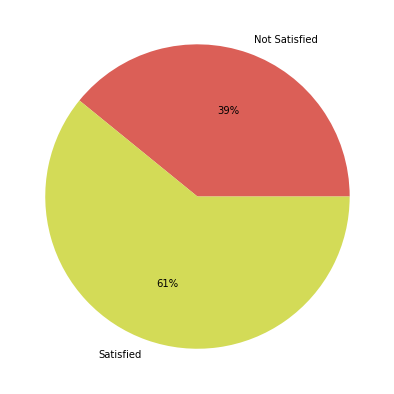

In [3569]:
# check the predicted variable
data = df_copy.groupby("review_scores_rating").size()
labels = ["Not Satisfied", "Satisfied"]
fig = plt.figure(figsize=(10, 7))
plt.pie(data, autopct='%.0f%%', labels = labels)

/var/folders/ls/7z9cnz814t76nd9h4dh8z0nh0000gn/T/ipykernel_43243/1011933565.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<AxesSubplot:>

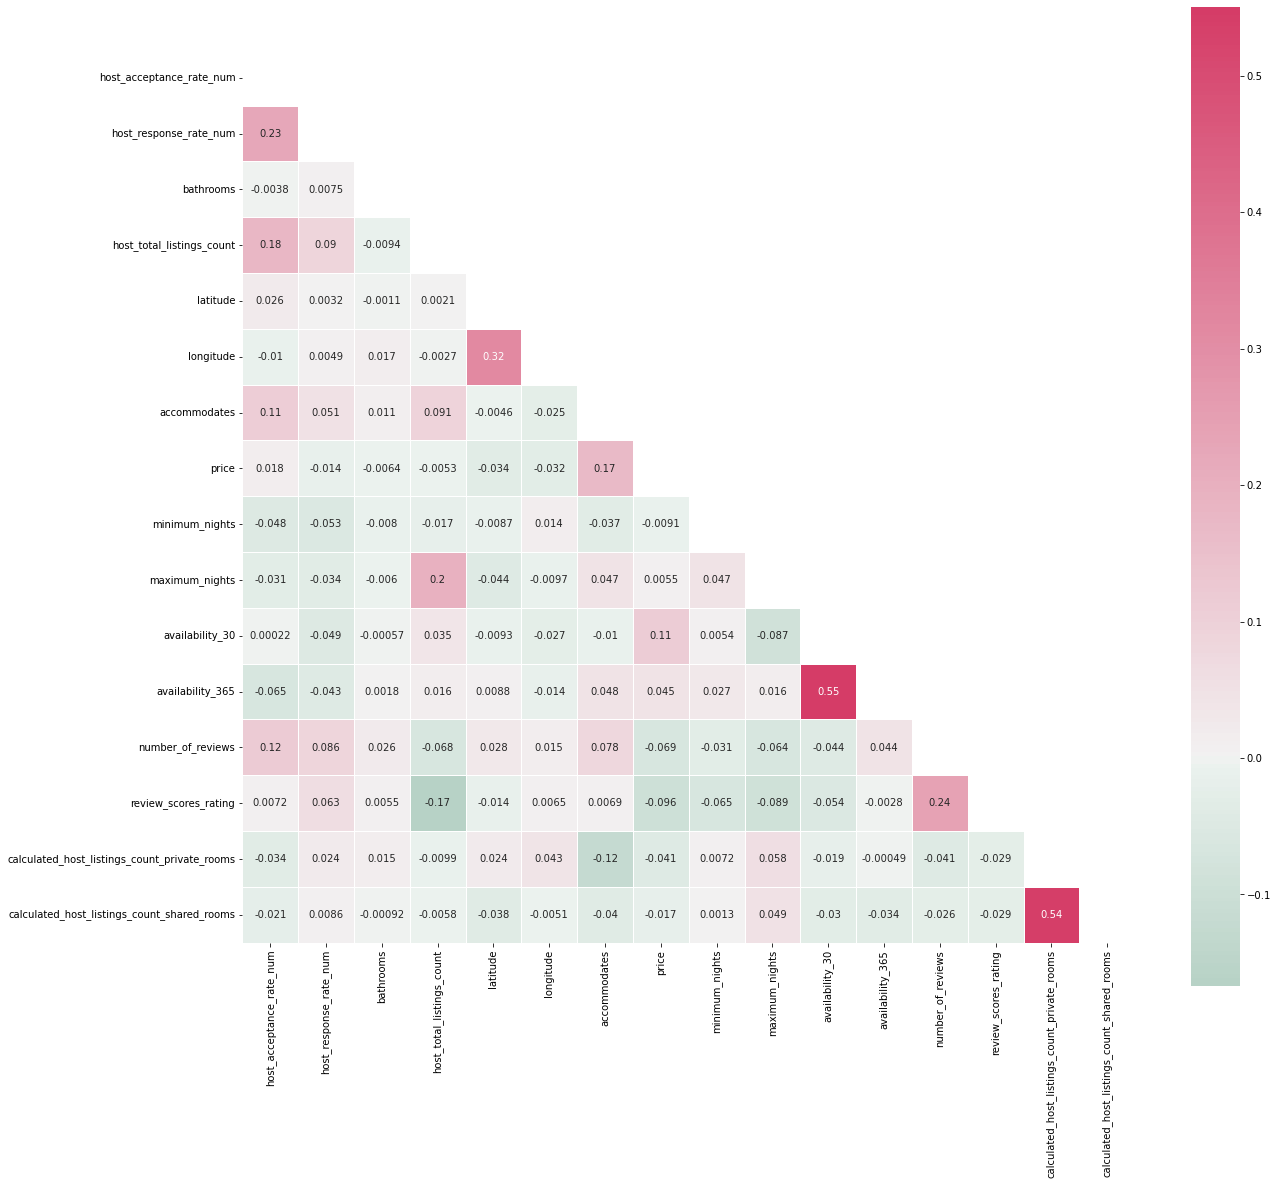

In [3570]:
# check the correlation
df_corr = df_copy.dropna( how='any', subset=list(df_copy.select_dtypes(include=["object"]).columns))



## Creating correlation matrix
corr = df_corr.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(150, 1, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

In [3571]:
# get number of missing value with rank
null= df_copy.isnull().sum().sort_values(ascending=False)

#get percent missing value
total = df_copy.shape[0]
percent_missing= (df_copy.isnull().sum()/total).sort_values(ascending=False)

#Combine the the dataset of missing value
missing_data= pd.concat([null, percent_missing], axis=1, 
                        keys=['Total missing', 'Percent missing'])
missing_data.reset_index(inplace=True)
missing_data = missing_data.rename(columns= { "index": " column name"})

#desplay the missing value information
missing_data.head(3)

,column name,Total missing,Percent missing
0,host_acceptance_rate_num,0,0.0
1,property_type,0,0.0
2,calculated_host_listings_count_private_rooms,0,0.0


<div class="alert alert-info"><b>Model 0</b> 

    - no feature engineer
    
    - Logistic model
    
</div>

In [3572]:
df_model_0 = df_copy.copy()
df_model_0.head()

,host_acceptance_rate_num,host_response_rate_num,bathrooms,last_scraped,description,host_since,host_response_time,host_is_superhost,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,amenities,price,minimum_nights,maximum_nights,availability_30,availability_365,number_of_reviews,review_scores_rating,instant_bookable,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,85.18158,94.267483,1.0,2021-12-15,I look forward to welcoming you in my flat; it...,2010-03-19,within an hour,f,1.0,"['email', 'reviews', 'jumio', 'offline_governm...",t,t,NAVIGLI,45.44806,9.17373,Entire rental unit,Entire home/apt,4,"[""Cooking basics"", ""Hot water"", ""Iron"", ""Hair ...",150.0,1,730,28,363,16,1,f,0,0
1,85.18158,94.267483,1.5,2021-12-15,<b>The space</b><br />I rent one room in Milan...,2010-05-10,a few days or more,f,1.0,"['email', 'phone', 'facebook', 'reviews', 'man...",t,t,SARPI,45.47647,9.17359,Private room in condominium (condo),Private room,2,"[""Breakfast"", ""Hot water"", ""Iron"", ""Hair dryer...",180.0,1,14,30,365,8,1,f,1,0
2,85.18158,94.267483,1.0,2021-12-15,"COZY, FULLY FURNISHED, PRIVATE STUDIO IN THE C...",2010-05-05,within an hour,t,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,BUENOS AIRES - VENEZIA,45.46884,9.20777,Private room in rental unit,Private room,1,"[""Hot water"", ""TV"", ""Kitchen"", ""Long term stay...",55.0,2,730,0,0,34,1,t,1,0
3,42.00000,100.000000,1.0,2021-12-15,In the most characteristic and served area of ...,2010-07-31,within an hour,f,2.0,"['email', 'phone', 'facebook', 'reviews']",t,t,MAGENTA - S. VITTORE,45.45814,9.17654,Entire condominium (condo),Entire home/apt,4,"[""Hot water"", ""TV"", ""Kitchen"", ""Microwave"", ""C...",220.0,2,30,29,364,16,0,f,0,0
4,85.18158,100.000000,1.0,2021-12-15,<b>The space</b><br />NICE 2 BEDROOM ATTIC IN...,2010-09-27,within a day,f,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,BUENOS AIRES - VENEZIA,45.48096,9.21686,Entire rental unit,Entire home/apt,3,"[""Hot water"", ""Iron"", ""Hair dryer"", ""TV with s...",145.0,3,180,30,365,2,1,f,0,0


In [3573]:
# Change the features 
df_model_0.drop(columns='host_since', inplace = True)
df_model_0.drop(columns='last_scraped', inplace = True)
df_model_0.drop(columns= 'host_verifications', inplace= True)
df_model_0.drop(columns= 'description', inplace= True)
df_model_0.drop(columns= 'amenities', inplace= True)


#Split the model
from sklearn.model_selection import train_test_split
#build X and y
X = df_model_0.drop(columns='review_scores_rating')
y = df_model_0['review_scores_rating']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [3574]:
df_model_0.head()
df_model_0.shape

,host_acceptance_rate_num,host_response_rate_num,bathrooms,host_response_time,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,price,minimum_nights,maximum_nights,availability_30,availability_365,number_of_reviews,review_scores_rating,instant_bookable,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,85.18158,94.267483,1.0,within an hour,f,1.0,t,t,NAVIGLI,45.44806,9.17373,Entire rental unit,Entire home/apt,4,150.0,1,730,28,363,16,1,f,0,0
1,85.18158,94.267483,1.5,a few days or more,f,1.0,t,t,SARPI,45.47647,9.17359,Private room in condominium (condo),Private room,2,180.0,1,14,30,365,8,1,f,1,0
2,85.18158,94.267483,1.0,within an hour,t,2.0,t,t,BUENOS AIRES - VENEZIA,45.46884,9.20777,Private room in rental unit,Private room,1,55.0,2,730,0,0,34,1,t,1,0
3,42.00000,100.000000,1.0,within an hour,f,2.0,t,t,MAGENTA - S. VITTORE,45.45814,9.17654,Entire condominium (condo),Entire home/apt,4,220.0,2,30,29,364,16,0,f,0,0
4,85.18158,100.000000,1.0,within a day,f,1.0,t,f,BUENOS AIRES - VENEZIA,45.48096,9.21686,Entire rental unit,Entire home/apt,3,145.0,3,180,30,365,2,1,f,0,0


(10105, 24)

In [3575]:
# Building the pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler


numerical_features = ['host_total_listings_count', 'host_verifications', 'accommodates',
                     'Description_Length','Sentiment_intensity', 'disance_from_centre',
                     'bedrooms’price','minimum_nights''maximum_nights','availability_90',
                     'reviews_per_month','bathrooms']

categorical_features = ['room_type',"neighbourhood_cleansed","host_has_profile_pic",
                       "host_identity_verified",'instant_bookable','host_is_superhost',
                        "property_type"]

class_2 = [['a few days or more', 'within an hour', 'within a day', 'within a few hours']]
ordinal_encoder_2 = OrdinalEncoder(categories=class_2)

preprocessing_steps = [('response_time_transformations', ordinal_encoder_2,['host_response_time']),
                       ('categorical_transformations', OneHotEncoder(sparse=False, handle_unknown='ignore', categories = 'auto'), categorical_features)]
transformer = ColumnTransformer(preprocessing_steps, remainder = 'passthrough')

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('response_time_transformations',
                                                  OrdinalEncoder(categories=[['a '
                                                                              'few '
                                                                              'days '
                                                                              'or '
                                                                              'more',
                                                                              'within '
                                                                              'an '
                                                                              'hour',
                                                                              'within '
                                                        

0.777997625643055

recall: 0.8006493506493506 precision: 0.8291862811028917 accuracy 0.777997625643055


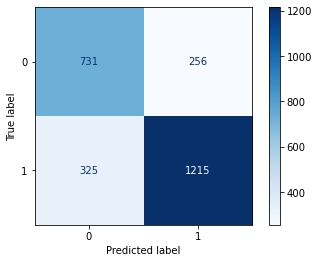

In [3576]:
# Evaluation

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

pipeline_steps = [('preprocess', transformer),
                  ('scaler', StandardScaler()),
                  ('dt', DecisionTreeClassifier())]
model_0 = Pipeline(pipeline_steps)
model_0.fit(X_train, y_train)
model_0.score(X_test,y_test)


from sklearn.metrics import recall_score, precision_score,accuracy_score
y_pred = model_0.predict(X_test)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print('recall:',recall, 
      'precision:',precision,
      "accuracy", accuracy)


from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def compute_cm(compas_pipe, X_train, y_train, X_test, y_test):
    compas_pipe.fit(X_train, y_train)
    y_pred = compas_pipe.predict(X_test)
    return(confusion_matrix(y_test, y_pred))
cm = compute_cm(model_0, X_train, y_train, X_test, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=None)
disp.plot(cmap="Blues")
plt.grid(False)
plt.show()

# 4. Feature engineer

<div class="alert alert-info"><b>4.1 Feature engineer</b> 
    
amenties
    
</div>

In [3577]:
X= df_copy[['amenities']].copy()

X['amenities_list'] = X['amenities'].apply(lambda x: x.replace('"','').replace("[","").replace("]","").split(","))
amenities = X['amenities_list'].apply(pd.Series).stack().reset_index(drop=True).drop_duplicates()
amenities = amenities.apply(lambda x: x.strip().upper()).drop_duplicates()

for a in [item for item in amenities]:
    X[a] = X['amenities'].apply(lambda x: int(a in x.upper()))

X.drop(columns = ['amenities','amenities_list'], inplace = True)



columns_name = X.columns.to_list()
len(columns_name)
columns_name.remove("")
len(columns_name)
X = X[columns_name]

/var/folders/ls/7z9cnz814t76nd9h4dh8z0nh0000gn/T/ipykernel_43243/1276188194.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  X[a] = X['amenities'].apply(lambda x: int(a in x.upper()))


785

784

In [3578]:
#Check Dummies and keep most popular 
keep_dummy = []
for i in X.columns:
    if X[i].sum() >1000:
        keep_dummy.append(i)
X = X[keep_dummy]

In [3579]:
#remove the imblance features
drop_dummy = []
for i in X.columns.to_list():
    if (X[i].value_counts()[0])/(X[i].value_counts().sum()) < 0.2 or (X[i].value_counts()[1])/(X[i].value_counts().sum()) < 0.2:
        drop_dummy.append(i)

last_dummy = set(X.columns.to_list()).difference(set(drop_dummy))
X = X[last_dummy]

In [3580]:
#merge the two data set
df_copy = pd.concat([X, df_copy], axis=1)

df_copy.drop(columns = ['amenities'], inplace = True)

<div class="alert alert-info"><b>4.2 Feature engineer</b> 
    
description
    
</div>

Text feature extraction

All Airbnb listings are provided with the detailed description of the accommodations in a text field “Description”. This field is very useful for hosts to highlight important and attractive features of their properties. We found out how this field impacts the price as well as user review ratings by creating 3 new features out of the description field:

1. Sentiment Intensity score – VADER sentiment intensity analyzer was used to identify the sentiment of each description. The range of values are from -1 to 1. VADER gives a cumulative score by adding the sentiment score of each word in the description. Strong positive words get a +ve score and similar –ve score is given to negative words. Negation is also incorporated while giving the score. Capitalized words and punctuations affect the overall score too.


2. Description Length - The length of the description was obtained by performing a word count on this field. This feature was engineered to find out if longer descriptions yielded in a higher rating and were people willing to pay the extra money just because the host was very friendly and enthusiastic.

In [3581]:

#text processing
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn import datasets, feature_extraction, decomposition
from nltk.stem.porter import PorterStemmer
import re
import operator
#nltk.download()

## Finding sentiment intensity score for description field
## saving "compound" score to listings dataframe

df_copy["Description_Length"] = np.nan
sent_int = SentimentIntensityAnalyzer()

for i in range(len(df_copy["description"])):
    s = df_copy['description'][i]
    
    ## generating sentiment intensity score for descriptions
    sentiment = sent_int.polarity_scores(s)
    df_copy.loc[i, "Sentiment_intensity"] = sentiment["compound"]
    
    ## Findig the length of the description
    df_copy.loc[i,"Description_Length"] = len(df_copy["description"][i].split())
    
##not to self: Perhaps show best and worst description in presentation (highest and lowest score)

In [3582]:
df_copy.drop(columns = ['description'], inplace = True)

<div class="alert alert-info"><b>Model 1</b> 

    - After 2 feature engineer
    
    - Logistic model
    
</div>

In [3583]:
df_model_1 = df_copy.copy()
df_model_1.head()
df_model_1.shape

,HOT WATER,COFFEE MAKER,SHAMPOO,IRON,MICROWAVE,HOST GREETS YOU,ELEVATOR,DISHWASHER,OVEN,REFRIGERATOR,BED LINENS,AIR CONDITIONING,PRIVATE ENTRANCE,DEDICATED WORKSPACE,COOKING BASICS,HANGERS,EXTRA PILLOWS AND BLANKETS,STOVE,DISHES AND SILVERWARE,FIRE EXTINGUISHER,FIRST AID KIT,PATIO OR BALCONY,host_acceptance_rate_num,host_response_rate_num,bathrooms,last_scraped,host_since,host_response_time,host_is_superhost,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,price,minimum_nights,maximum_nights,availability_30,availability_365,number_of_reviews,review_scores_rating,instant_bookable,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,Description_Length,Sentiment_intensity
0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,1,0,1,0,0,0,85.18158,94.267483,1.0,2021-12-15,2010-03-19,within an hour,f,1.0,"['email', 'reviews', 'jumio', 'offline_governm...",t,t,NAVIGLI,45.44806,9.17373,Entire rental unit,Entire home/apt,4,150.0,1,730,28,363,16,1,f,0,0,175.0,0.7992
1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,85.18158,94.267483,1.5,2021-12-15,2010-05-10,a few days or more,f,1.0,"['email', 'phone', 'facebook', 'reviews', 'man...",t,t,SARPI,45.47647,9.17359,Private room in condominium (condo),Private room,2,180.0,1,14,30,365,8,1,f,1,0,131.0,0.6239
2,1,0,1,1,0,1,1,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,85.18158,94.267483,1.0,2021-12-15,2010-05-05,within an hour,t,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,BUENOS AIRES - VENEZIA,45.46884,9.20777,Private room in rental unit,Private room,1,55.0,2,730,0,0,34,1,t,1,0,154.0,0.9833
3,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,0,42.00000,100.000000,1.0,2021-12-15,2010-07-31,within an hour,f,2.0,"['email', 'phone', 'facebook', 'reviews']",t,t,MAGENTA - S. VITTORE,45.45814,9.17654,Entire condominium (condo),Entire home/apt,4,220.0,2,30,29,364,16,0,f,0,0,105.0,-0.5123
4,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,85.18158,100.000000,1.0,2021-12-15,2010-09-27,within a day,f,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,BUENOS AIRES - VENEZIA,45.48096,9.21686,Entire rental unit,Entire home/apt,3,145.0,3,180,30,365,2,1,f,0,0,143.0,0.1297


(10105, 51)

In [3584]:
# Change the features 
df_model_1.drop(columns='host_since', inplace = True)
df_model_1.drop(columns='last_scraped', inplace = True)
df_model_1.drop(columns= 'host_verifications', inplace= True)

#Split the model
from sklearn.model_selection import train_test_split
#build X and y
X = df_model_1.drop(columns='review_scores_rating')
y = df_model_1['review_scores_rating']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [3585]:
# Building the pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler


numerical_features = ['host_total_listings_count', 'host_verifications', 'accommodates',
                     'Description_Length','Sentiment_intensity', 'disance_from_centre',
                     'bedrooms’price','minimum_nights''maximum_nights','availability_90',
                     'reviews_per_month','bathrooms']

categorical_features = ['room_type',"neighbourhood_cleansed","host_has_profile_pic",
                       "host_identity_verified",'instant_bookable','host_is_superhost',
                        "property_type"]

class_2 = [['a few days or more', 'within an hour', 'within a day', 'within a few hours']]
ordinal_encoder_2 = OrdinalEncoder(categories=class_2)

preprocessing_steps = [('response_time_transformations', ordinal_encoder_2,['host_response_time']),
                       ('categorical_transformations', OneHotEncoder(sparse=False, handle_unknown='ignore', categories = 'auto'), categorical_features)]
transformer = ColumnTransformer(preprocessing_steps, remainder = 'passthrough')

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('response_time_transformations',
                                                  OrdinalEncoder(categories=[['a '
                                                                              'few '
                                                                              'days '
                                                                              'or '
                                                                              'more',
                                                                              'within '
                                                                              'an '
                                                                              'hour',
                                                                              'within '
                                                        

0.775623268698061

recall: 0.8036649214659686 precision: 0.8214046822742475 accuracy 0.775623268698061


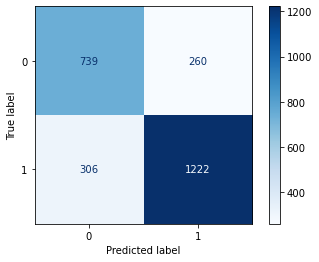

In [3586]:
# Evaluation

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

pipeline_steps = [('preprocess', transformer),
                  ('scaler', StandardScaler()),
                  ('dt', DecisionTreeClassifier())]
model_1 = Pipeline(pipeline_steps)
model_1.fit(X_train, y_train)
model_1.score(X_test,y_test)


from sklearn.metrics import recall_score, precision_score,accuracy_score
y_pred = model_1.predict(X_test)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print('recall:',recall, 
      'precision:',precision,
      "accuracy", accuracy)


from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def compute_cm(compas_pipe, X_train, y_train, X_test, y_test):
    compas_pipe.fit(X_train, y_train)
    y_pred = compas_pipe.predict(X_test)
    return(confusion_matrix(y_test, y_pred))
cm = compute_cm(model_1, X_train, y_train, X_test, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=None)
disp.plot(cmap="Blues")
plt.grid(False)
plt.show()

<div class="alert alert-info"><b>4.3 Feature engineer</b> 
    
getting distances from centre
    
</div>

/Users/liziheng/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='disance_from_centre', ylabel='Density'>

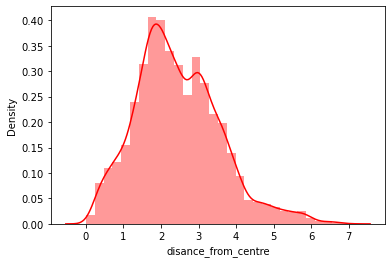

In [3587]:
#distance to center
import seaborn as sns 
from math import radians, sin, cos, atan2, sqrt


# Use latitude and longitude to calculate the distance to the center
def haversine(lat1, long1, lat2, long2):
    lat1, long1, lat2, long2 = map(radians, [lat1, long1, lat2, long2])
    a = sin((lat1-lat2)/2)**2 + cos(lat1)*cos(lat2)*(sin((long1-long2)/2)**2)
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    return 6371 * c

#45.4641,9.1919 is the lat and long of centre of milan
distance = []
for i in range(len(df_copy)):
    distance.append(haversine(df_copy['latitude'].values[i], df_copy['longitude'].values[i], 45.4641,9.1919))
    
    
df_copy['disance_from_centre'] = distance

df_copy.drop(["latitude","longitude"],axis = 1,inplace = True)

#visualize 'distance to center'
sns.set_palette("hls") 
sns.distplot(df_copy['disance_from_centre'],color="r",bins=30,kde=True)
plt.show()


<div class="alert alert-info"><b>4.2 Feature engineer</b> 
    
Convert host_accept_rate features to dummy
    
</div>

In [3588]:
df_copy.head()

,HOT WATER,COFFEE MAKER,SHAMPOO,IRON,MICROWAVE,HOST GREETS YOU,ELEVATOR,DISHWASHER,OVEN,REFRIGERATOR,BED LINENS,AIR CONDITIONING,PRIVATE ENTRANCE,DEDICATED WORKSPACE,COOKING BASICS,HANGERS,EXTRA PILLOWS AND BLANKETS,STOVE,DISHES AND SILVERWARE,FIRE EXTINGUISHER,FIRST AID KIT,PATIO OR BALCONY,host_acceptance_rate_num,host_response_rate_num,bathrooms,last_scraped,host_since,host_response_time,host_is_superhost,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,price,minimum_nights,maximum_nights,availability_30,availability_365,number_of_reviews,review_scores_rating,instant_bookable,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,Description_Length,Sentiment_intensity,disance_from_centre
0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,1,0,1,0,0,0,85.18158,94.267483,1.0,2021-12-15,2010-03-19,within an hour,f,1.0,"['email', 'reviews', 'jumio', 'offline_governm...",t,t,NAVIGLI,Entire rental unit,Entire home/apt,4,150.0,1,730,28,363,16,1,f,0,0,175.0,0.7992,2.278080
1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,85.18158,94.267483,1.5,2021-12-15,2010-05-10,a few days or more,f,1.0,"['email', 'phone', 'facebook', 'reviews', 'man...",t,t,SARPI,Private room in condominium (condo),Private room,2,180.0,1,14,30,365,8,1,f,1,0,131.0,0.6239,1.982557
2,1,0,1,1,0,1,1,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,85.18158,94.267483,1.0,2021-12-15,2010-05-05,within an hour,t,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,BUENOS AIRES - VENEZIA,Private room in rental unit,Private room,1,55.0,2,730,0,0,34,1,t,1,0,154.0,0.9833,1.345163
3,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,0,42.00000,100.000000,1.0,2021-12-15,2010-07-31,within an hour,f,2.0,"['email', 'phone', 'facebook', 'reviews']",t,t,MAGENTA - S. VITTORE,Entire condominium (condo),Entire home/apt,4,220.0,2,30,29,364,16,0,f,0,0,105.0,-0.5123,1.369043
4,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,85.18158,100.000000,1.0,2021-12-15,2010-09-27,within a day,f,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,BUENOS AIRES - VENEZIA,Entire rental unit,Entire home/apt,3,145.0,3,180,30,365,2,1,f,0,0,143.0,0.1297,2.702340


In [3589]:
very_slow = list(range(0,21))
medium_slow =list(range(21,41))
slow = list(range(41,61))
fast = list(range(61,81))
very_fast = list(range(81,101))


def class_define(x):
    if x <= 20:
        return('very_slow')
    elif x > 20 and x <= 40:
        return('medium_slow')
    elif x  > 40 and x <= 60:
        return("slow")
    elif x  > 60 and x <= 80:
        return('fast')
    elif x   > 80 and x <= 100:
        return('very_fast')
df_copy['host_acceptance_rate_class'] = df_copy['host_acceptance_rate_num'].apply(class_define)
df_copy['host_response_rate_class'] = df_copy['host_response_rate_num'].apply(class_define)

df_copy.drop("host_acceptance_rate_num",axis = 1,inplace = True)
df_copy.drop("host_response_rate_num",axis = 1,inplace = True)

df_copy.head()

,HOT WATER,COFFEE MAKER,SHAMPOO,IRON,MICROWAVE,HOST GREETS YOU,ELEVATOR,DISHWASHER,OVEN,REFRIGERATOR,BED LINENS,AIR CONDITIONING,PRIVATE ENTRANCE,DEDICATED WORKSPACE,COOKING BASICS,HANGERS,EXTRA PILLOWS AND BLANKETS,STOVE,DISHES AND SILVERWARE,FIRE EXTINGUISHER,FIRST AID KIT,PATIO OR BALCONY,bathrooms,last_scraped,host_since,host_response_time,host_is_superhost,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,price,minimum_nights,maximum_nights,availability_30,availability_365,number_of_reviews,review_scores_rating,instant_bookable,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,Description_Length,Sentiment_intensity,disance_from_centre,host_acceptance_rate_class,host_response_rate_class
0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,1,0,1,0,0,0,1.0,2021-12-15,2010-03-19,within an hour,f,1.0,"['email', 'reviews', 'jumio', 'offline_governm...",t,t,NAVIGLI,Entire rental unit,Entire home/apt,4,150.0,1,730,28,363,16,1,f,0,0,175.0,0.7992,2.278080,very_fast,very_fast
1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1.5,2021-12-15,2010-05-10,a few days or more,f,1.0,"['email', 'phone', 'facebook', 'reviews', 'man...",t,t,SARPI,Private room in condominium (condo),Private room,2,180.0,1,14,30,365,8,1,f,1,0,131.0,0.6239,1.982557,very_fast,very_fast
2,1,0,1,1,0,1,1,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1.0,2021-12-15,2010-05-05,within an hour,t,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,BUENOS AIRES - VENEZIA,Private room in rental unit,Private room,1,55.0,2,730,0,0,34,1,t,1,0,154.0,0.9833,1.345163,very_fast,very_fast
3,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,0,1.0,2021-12-15,2010-07-31,within an hour,f,2.0,"['email', 'phone', 'facebook', 'reviews']",t,t,MAGENTA - S. VITTORE,Entire condominium (condo),Entire home/apt,4,220.0,2,30,29,364,16,0,f,0,0,105.0,-0.5123,1.369043,slow,very_fast
4,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1.0,2021-12-15,2010-09-27,within a day,f,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,BUENOS AIRES - VENEZIA,Entire rental unit,Entire home/apt,3,145.0,3,180,30,365,2,1,f,0,0,143.0,0.1297,2.702340,very_fast,very_fast


In [3590]:
df_copy.shape

(10105, 50)

<div class="alert alert-info"><b>4.3 Feature engineer</b> 
    
host_verifications
    
</div>

In [3591]:
num_verifications = []
for i in range(len(df_copy)):
    num_verifications.append(len(df_copy['host_verifications'][i].split(',')))
df_copy['host_verifications'] = num_verifications

<div class="alert alert-info"><b>4.5 Feature engineer</b> 
    
To get days of operation from last_scraped and host_since
    
</div>

/Users/liziheng/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='host_days', ylabel='Density'>

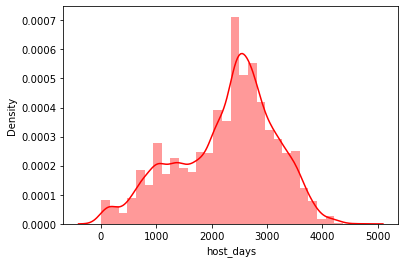

In [3592]:

df_copy['host_days'] = (df_copy['last_scraped'] - df_copy['host_since']).dt.days
df_copy.drop(columns = ['last_scraped', "host_since"], inplace = True)

#visualize 'distance to center'
sns.set_palette("hls") 
sns.distplot(df_copy['host_days'],color="r",bins=30,kde=True)
plt.show()

#drop na
df_copy.dropna( how='any', subset=['host_days'],inplace=True)

# 5. Final check 

<div class="alert alert-block alert-warning">
    
5.1 Removing Outliers
</div>

In [3593]:
df_copy.head()

,HOT WATER,COFFEE MAKER,SHAMPOO,IRON,MICROWAVE,HOST GREETS YOU,ELEVATOR,DISHWASHER,OVEN,REFRIGERATOR,BED LINENS,AIR CONDITIONING,PRIVATE ENTRANCE,DEDICATED WORKSPACE,COOKING BASICS,HANGERS,EXTRA PILLOWS AND BLANKETS,STOVE,DISHES AND SILVERWARE,FIRE EXTINGUISHER,FIRST AID KIT,PATIO OR BALCONY,bathrooms,host_response_time,host_is_superhost,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,price,minimum_nights,maximum_nights,availability_30,availability_365,number_of_reviews,review_scores_rating,instant_bookable,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,Description_Length,Sentiment_intensity,disance_from_centre,host_acceptance_rate_class,host_response_rate_class,host_days
0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,1,0,1,0,0,0,1.0,within an hour,f,1.0,5,t,t,NAVIGLI,Entire rental unit,Entire home/apt,4,150.0,1,730,28,363,16,1,f,0,0,175.0,0.7992,2.278080,very_fast,very_fast,4289
1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1.5,a few days or more,f,1.0,8,t,t,SARPI,Private room in condominium (condo),Private room,2,180.0,1,14,30,365,8,1,f,1,0,131.0,0.6239,1.982557,very_fast,very_fast,4237
2,1,0,1,1,0,1,1,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1.0,within an hour,t,2.0,8,t,t,BUENOS AIRES - VENEZIA,Private room in rental unit,Private room,1,55.0,2,730,0,0,34,1,t,1,0,154.0,0.9833,1.345163,very_fast,very_fast,4242
3,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,0,1.0,within an hour,f,2.0,4,t,t,MAGENTA - S. VITTORE,Entire condominium (condo),Entire home/apt,4,220.0,2,30,29,364,16,0,f,0,0,105.0,-0.5123,1.369043,slow,very_fast,4155
4,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1.0,within a day,f,1.0,4,t,f,BUENOS AIRES - VENEZIA,Entire rental unit,Entire home/apt,3,145.0,3,180,30,365,2,1,f,0,0,143.0,0.1297,2.702340,very_fast,very_fast,4097


In [3594]:
df_copy.shape

(10105, 49)

In [3595]:
numerical_features = ['host_total_listings_count', 'host_verifications', 
                      'accommodates', 'Description_Length','Sentiment_intensity', 
                      'disance_from_centre',"host_days","price","minimum_nights",
                      'maximum_nights', "number_of_reviews",
                     'bathrooms',"availability_30", "availability_365",
                     "calculated_host_listings_count_private_rooms",
                     "calculated_host_listings_count_shared_rooms"]

In [3596]:
df_copy.reset_index(drop = True, inplace=True)
numerical_item = numerical_features
target_df = numerical_item
z = np.abs(stats.zscore(df_copy[target_df]))
clean_df = df_copy[target_df]
clean_df = clean_df[(z < 3).all(axis = 1)]
df_copy = df_copy.iloc[clean_df.index.tolist()]
df_copy.reset_index(drop = True, inplace=True)
df_copy.shape

(8959, 49)

([<matplotlib.patches.Wedge at 0x7f8a2e8ae250>,
 [Text(0.4075967408605215, 1.0216970670604282, 'Not Satisfied'),
  Text(-0.4075967408605218, -1.021697067060428, 'Satisfied')],
 [Text(0.22232549501482987, 0.557289309305688, '38%'),
  Text(-0.22232549501483004, -0.557289309305688, '62%')])

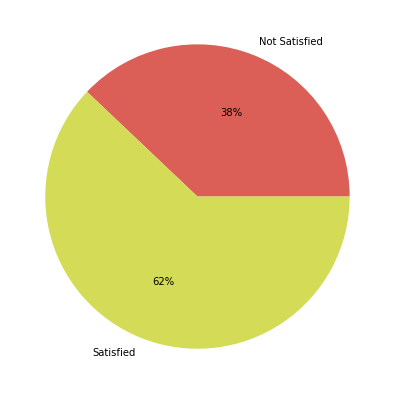

In [3597]:
# check the predicted variable
data = df_copy.groupby("review_scores_rating").size()
labels = ["Not Satisfied", "Satisfied"]
fig = plt.figure(figsize=(10, 7))
plt.pie(data, autopct='%.0f%%', labels = labels)

<div class="alert alert-info"><b>model_2</b> 
    
     - After all feature enginner 
     - Remove the features are not importances: 1% as reference
     
</div>

In [3598]:
feature_importances = pd.read_csv("/Users/liziheng/Desktop/feature_importance.csv")
feature_importances 

,Field,Importance
0,number_of_reviews,0.25738
1,host_total_listings_count,0.10142
2,host_is_superhost,0.07998
3,DISHWASHER,0.05867
4,host_days,0.05351
5,price,0.05209
6,disance_from_centre,0.04255
7,neighbourhood_cleansed,0.03851
8,host_verifications,0.02864
9,minimum_nights,0.02759


In [3599]:
select_features = feature_importances['Field'][:18].to_list()
select_features.append("review_scores_rating")
df_copy = df_copy[select_features]

In [3600]:
df_copy.head()

,number_of_reviews,host_total_listings_count,host_is_superhost,DISHWASHER,host_days,price,disance_from_centre,neighbourhood_cleansed,host_verifications,minimum_nights,availability_365,Description_Length,SHAMPOO,HOT WATER,Sentiment_intensity,FIRE EXTINGUISHER,maximum_nights,availability_30,review_scores_rating
0,16,1.0,f,0,4289,150.0,2.278080,NAVIGLI,5,1,363,175.0,0,1,0.7992,0,730,28,1
1,8,1.0,f,0,4237,180.0,1.982557,SARPI,8,1,365,131.0,1,1,0.6239,0,14,30,1
2,34,2.0,t,0,4242,55.0,1.345163,BUENOS AIRES - VENEZIA,8,2,0,154.0,1,1,0.9833,0,730,0,1
3,16,2.0,f,1,4155,220.0,1.369043,MAGENTA - S. VITTORE,4,2,364,105.0,1,1,-0.5123,0,30,29,0
4,2,1.0,f,0,4097,145.0,2.702340,BUENOS AIRES - VENEZIA,4,3,365,143.0,0,1,0.1297,0,180,30,1


In [3601]:
df_model_3 = df_copy.copy() 
from sklearn.model_selection import train_test_split
#build X and y
X = df_model_3.drop(columns='review_scores_rating')
y = df_model_3['review_scores_rating']
X_train, X_test, y_train, y_test = train_test_split(X, y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical_transformations',
                                                  OneHotEncoder(sparse=False),
                                                  ['neighbourhood_cleansed',
                                                   'host_is_superhost'])])),
                ('scaler', MinMaxScaler()), ('dt', DecisionTreeClassifier())])

0.7638392857142857

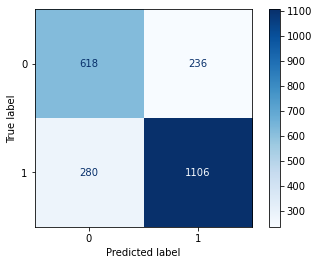

recall: 0.797979797979798 precision: 0.8241430700447094 accuracy 0.7696428571428572


In [3602]:
# Pipeline after remove the less importances features




from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler



categorical_features = ["neighbourhood_cleansed",
                        'host_is_superhost']
                       



               





preprocessing_steps = [
                       ('categorical_transformations', OneHotEncoder(sparse=False, categories = 'auto'), categorical_features)]
transformer = ColumnTransformer(preprocessing_steps, remainder = 'passthrough')



from sklearn.tree import DecisionTreeClassifier

pipeline_steps = [('preprocess', transformer),
                  ('scaler', MinMaxScaler()),
                  ('dt', DecisionTreeClassifier())]

model_2 = Pipeline(pipeline_steps)
model_2.fit(X_train, y_train)
model_2.score(X_test,y_test)


from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def compute_cm(compas_pipe, X_train, y_train, X_test, y_test):
    compas_pipe.fit(X_train, y_train)
    y_pred = compas_pipe.predict(X_test)
    return(confusion_matrix(y_test, y_pred))
cm = compute_cm(model_2, X_train, y_train, X_test, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=None)
disp.plot(cmap="Blues")
plt.grid(False)
plt.show()



from sklearn.metrics import recall_score, precision_score,accuracy_score
y_pred = model_2.predict(X_test)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print('recall:',recall, 
      'precision:',precision,
      "accuracy", accuracy)

<div class="alert alert-info"><b>model 5</b> 
    
     - GBboost on the best performentce of dataset
    
</div>

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical_transformations',
                                                  OneHotEncoder(sparse=False),
                                                  ['neighbourhood_cleansed',
                                                   'host_is_superhost'])])),
                ('scaler', MinMaxScaler()),
                ('model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1,
                               disable_defaul...
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='

0.8290178571428571

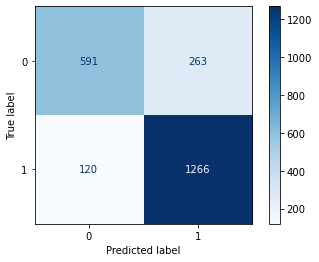

recall: 0.9134199134199135 precision: 0.8279921517331589 accuracy 0.8290178571428571


In [3603]:
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

pipeline_steps = [
  ('transformer', transformer),
  ('scaler', MinMaxScaler()), 
  ('model', XGBClassifier(use_label_encoder=False,
                          disable_default_eval_metric=True))]
model_3 = Pipeline(pipeline_steps)
model_3.fit(X_train, y_train)
model_3.score(X_test,y_test)



from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def compute_cm(compas_pipe, X_train, y_train, X_test, y_test):
    compas_pipe.fit(X_train, y_train)
    y_pred = compas_pipe.predict(X_test)
    return(confusion_matrix(y_test, y_pred))
cm = compute_cm(model_3, X_train, y_train, X_test, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=None)
disp.plot(cmap="Blues")
plt.grid(False)
plt.show()



from sklearn.metrics import recall_score, precision_score,accuracy_score
y_pred = model_3.predict(X_test)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print('recall:',recall, 
      'precision:',precision,
      "accuracy", accuracy)

<div class="alert alert-info"><b>Cross validation</b> 
    
     - cross-validation 
    
</div>

In [3604]:
#not finished 

min_folds = 2
max_folds = 20
mean_scores = []
for n in range(min_folds, max_folds):
    scores = cross_val_score(model_3, X, y, cv=n)
    mean_scores.append(scores.mean())


(0.77, 0.82)

Text(0.5, 0, 'folds')

Text(0, 0.5, 'Mean accuracy')

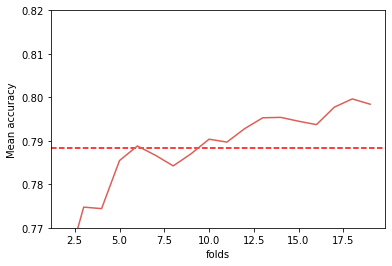

In [3605]:
    
import matplotlib.pyplot as plt
import numpy as np
plt.axhline(y = np.mean(mean_scores), linestyle='dashed', color='red')
plt.plot(range(min_folds, max_folds),mean_scores)
plt.ylim(0.77,0.82)
plt.xlabel('folds')
plt.ylabel('Mean accuracy')
plt.show()

<div class="alert alert-info"><b>Grit seach</b> 
    
     - Find the best parameters
    
</div>